In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
import datetime
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
import os
import cv2


In [39]:
X = []
y = []
for i in range(10):
    for d in os.listdir("../assets/{}".format(i)):
        t_img = cv2.imread("../assets/{}".format(i)+"/"+d)
        t_img = cv2.cvtColor(t_img,cv2.COLOR_BGR2GRAY)
        X.append(t_img)
        y.append(i)

X_life = []
for d in os.listdir("../data/"):
    t_img = cv2.imread("../data/"+d)
    t_img = cv2.cvtColor(t_img,cv2.COLOR_BGR2GRAY)
    t_img = 255 - t_img
    X_life.append(t_img)

X_life = np.array(X_life)
X_life = X_life.reshape((X_life.shape[0], 28, 28, 1)).astype('float32')

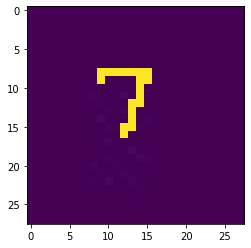

In [40]:
len(X_life)
plt.imshow(X_life[0])
plt.show()

In [6]:
X = np.array(X)
y = np.array(y)

In [7]:
display(X.shape)
y.shape

(3456, 28, 28)

(3456,)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state= 21)

In [10]:
X_train.shape

(2764, 28, 28)

In [11]:
y_test

array([7, 9, 7, 5, 1, 2, 6, 5, 7, 5, 5, 9, 6, 8, 9, 8, 9, 8, 4, 3, 7, 7,
       8, 7, 4, 4, 2, 7, 4, 8, 5, 5, 6, 6, 4, 9, 9, 3, 4, 9, 5, 9, 7, 4,
       7, 9, 3, 2, 5, 4, 8, 5, 2, 4, 2, 9, 1, 7, 3, 3, 1, 7, 6, 4, 4, 1,
       1, 2, 9, 1, 9, 2, 2, 6, 9, 3, 3, 1, 2, 5, 4, 9, 2, 7, 6, 6, 8, 3,
       2, 8, 6, 5, 2, 1, 8, 2, 1, 8, 6, 1, 1, 1, 4, 5, 7, 5, 2, 8, 6, 3,
       8, 6, 5, 7, 1, 3, 2, 2, 6, 6, 2, 9, 7, 7, 9, 8, 5, 4, 4, 2, 3, 5,
       2, 8, 2, 1, 6, 2, 7, 2, 8, 2, 7, 3, 6, 7, 6, 2, 5, 2, 1, 9, 4, 1,
       3, 4, 8, 9, 8, 4, 6, 5, 3, 2, 4, 3, 9, 2, 4, 5, 3, 8, 5, 9, 9, 4,
       5, 1, 4, 1, 9, 2, 3, 5, 1, 1, 3, 1, 9, 4, 1, 8, 3, 7, 6, 8, 4, 4,
       3, 6, 5, 6, 5, 8, 5, 5, 6, 9, 8, 7, 5, 7, 2, 9, 4, 8, 2, 7, 9, 4,
       2, 5, 1, 8, 8, 5, 1, 5, 4, 5, 5, 6, 5, 7, 7, 4, 3, 9, 3, 4, 6, 1,
       3, 9, 7, 1, 7, 4, 9, 5, 5, 7, 4, 6, 3, 2, 4, 1, 8, 5, 4, 6, 3, 1,
       6, 3, 8, 3, 3, 7, 3, 5, 8, 3, 1, 1, 6, 6, 3, 7, 6, 6, 9, 1, 2, 5,
       6, 5, 7, 9, 7, 6, 8, 6, 2, 5, 4, 8, 2, 9, 5,

In [12]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [13]:
num_classes

10

In [14]:
def larger_model():
    # create model
	model = keras.Sequential(
    [
        Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'),
        MaxPooling2D(),
        Conv2D(15, (3, 3), activation='relu'),
        MaxPooling2D(),
        Dropout(0.2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(50, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    

    # Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


In [36]:
model = larger_model()
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [37]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10,callbacks=[tensorboard_callback])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
277/277 [==============================] - 2s 5ms/step - loss: 1.8875 - accuracy: 0.2873 - val_loss: 1.0985 - val_accuracy: 0.6040
Epoch 2/10
277/277 [==============================] - 1s 4ms/step - loss: 0.7860 - accuracy: 0.7149 - val_loss: 0.5879 - val_accuracy: 0.8194
Epoch 3/10
277/277 [==============================] - 1s 4ms/step - loss: 0.4247 - accuracy: 0.8520 - val_loss: 0.3180 - val_accuracy: 0.8916
Epoch 4/10
277/277 [==============================] - 1s 4ms/step - loss: 0.2930 - accuracy: 0.9103 - val_loss: 0.3865 - val_accuracy: 0.8714
Epoch 5/10
277/277 [==============================] - 1s 4ms/step - loss: 0.2071 - accuracy: 0.9266 - val_loss: 0.1675 - val_accuracy: 0.9364
Epoch 6/10
277/277 [==============================] - 1s 4ms/step - loss: 0.1631 - accuracy: 0.9475 - val_loss: 0.1205 - val_accuracy: 0.9639
Epoch 7/10
277/277 [==============================] - 1s 4ms/step - loss: 0.1201 - accuracy: 0.9649 - val_loss: 0.1248 - val_accuracy: 0.9639
Epoch 

In [18]:
scores

[0.05453675240278244, 0.9783236980438232]

In [20]:
pred = model.predict(X_test,verbose = 1)

22/22 [==============================] - 0s 2ms/step


In [21]:
pred

array([[1.2660520e-17, 8.9209759e-12, 1.9521401e-07, ..., 9.9999976e-01,
        1.8559875e-20, 1.8826920e-13],
       [5.8550888e-18, 8.7346688e-13, 7.8649706e-13, ..., 4.5990208e-13,
        6.2315717e-06, 9.9989104e-01],
       [8.1366526e-21, 1.1167941e-11, 1.3764435e-03, ..., 9.9862361e-01,
        1.3030292e-12, 9.4909081e-10],
       ...,
       [1.4561584e-14, 1.1376375e-08, 1.8186159e-06, ..., 9.9999821e-01,
        1.1544806e-18, 4.0423238e-12],
       [2.1139352e-21, 1.2651182e-13, 1.0000000e+00, ..., 4.0919064e-13,
        2.0601537e-18, 3.1245226e-24],
       [6.1682114e-37, 9.5074278e-19, 3.6254908e-06, ..., 4.0280617e-20,
        9.9999642e-01, 9.7139762e-11]], dtype=float32)

In [31]:
len(X_life)

810

/home/theodor/Software/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


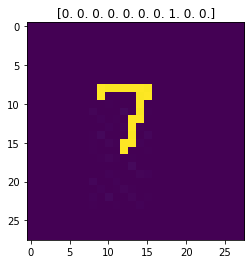

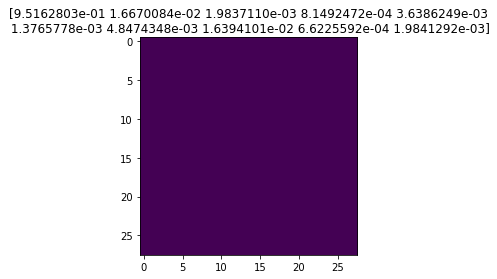

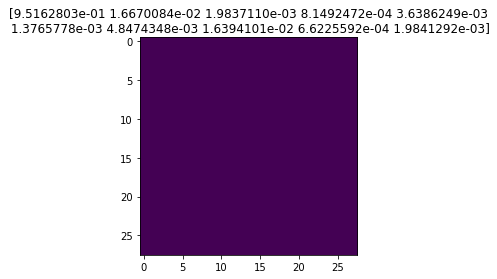

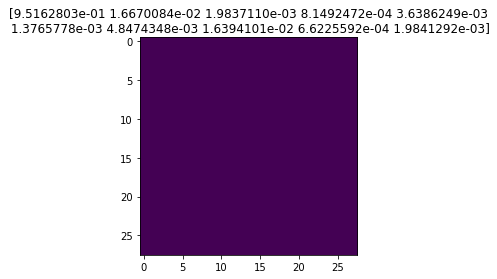

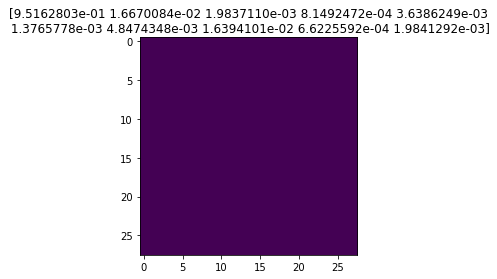

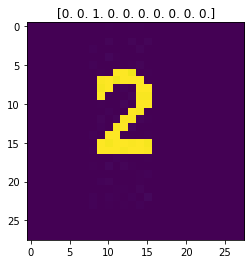

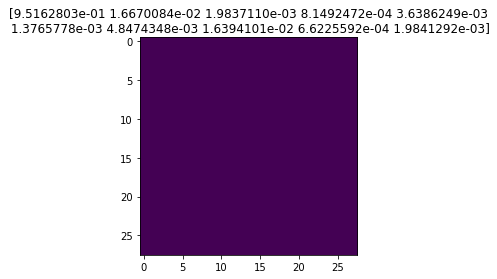

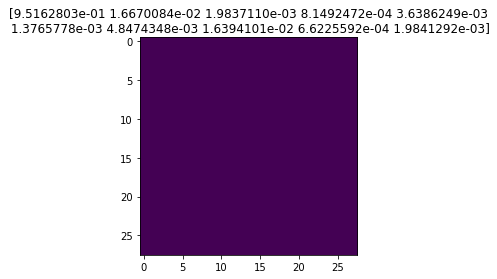

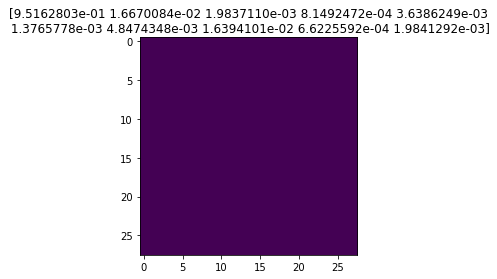

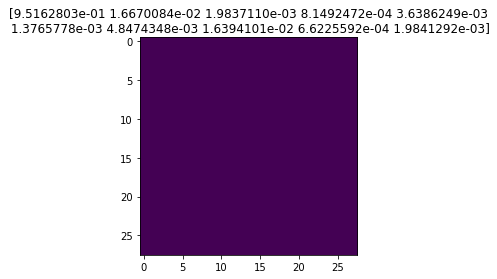

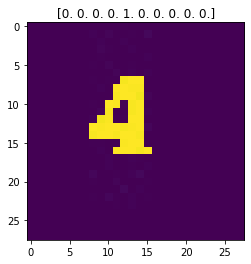

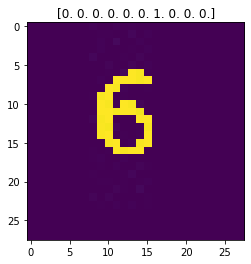

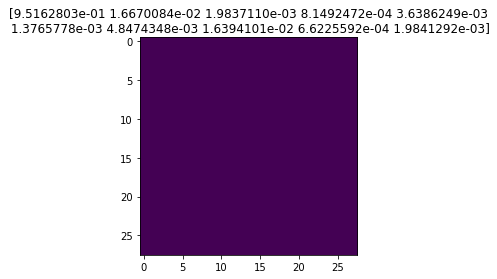

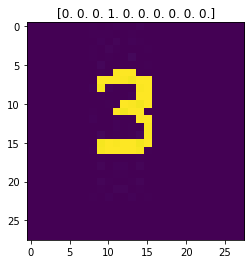

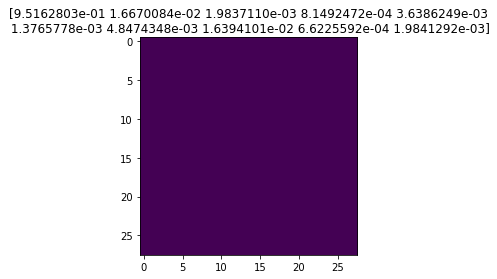

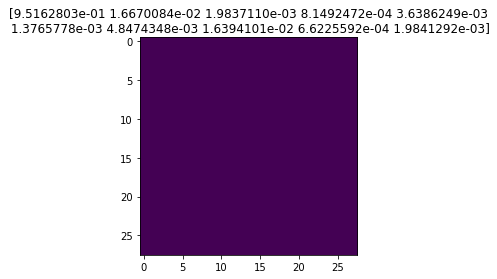

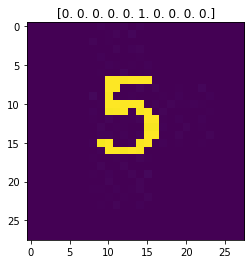

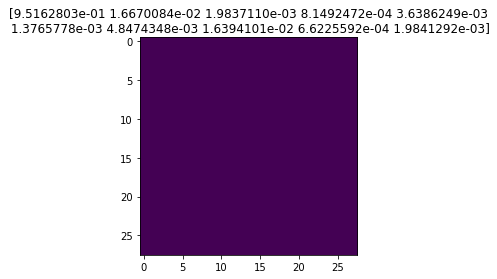

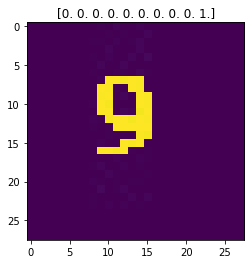

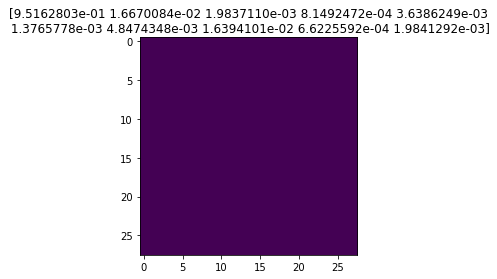

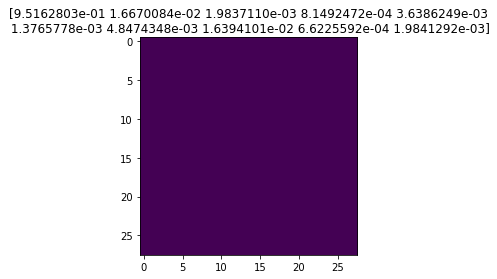

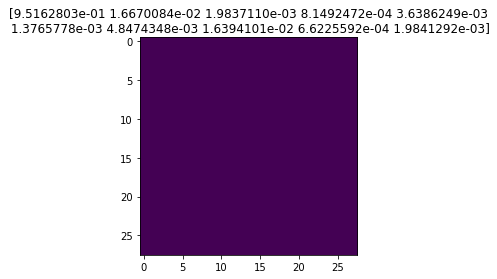

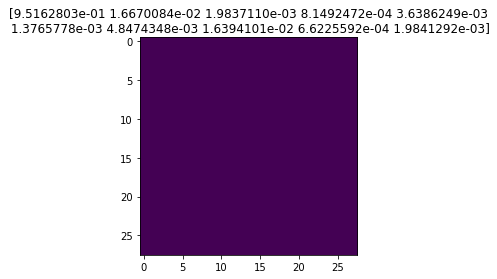

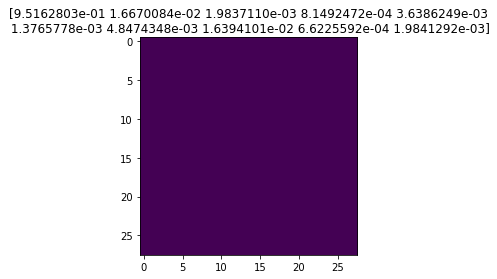

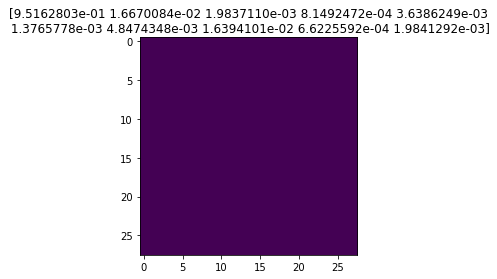

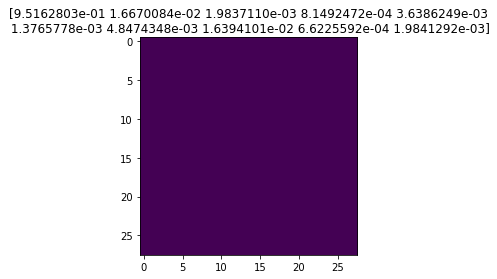

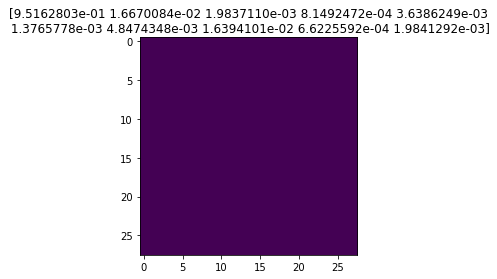

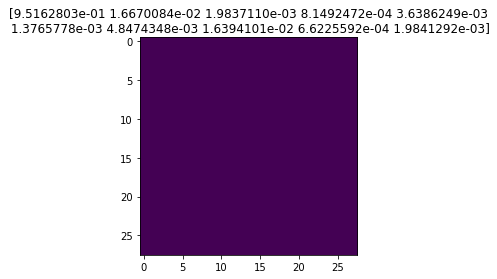

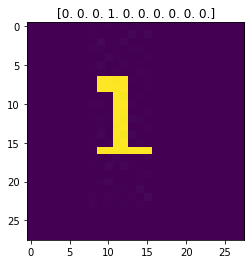

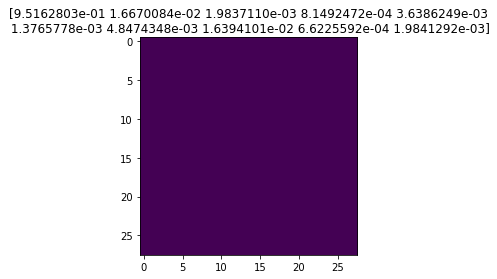

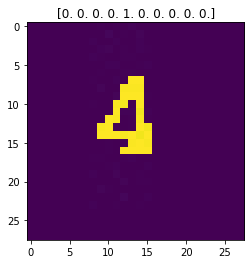

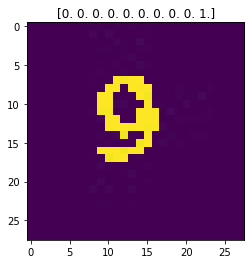

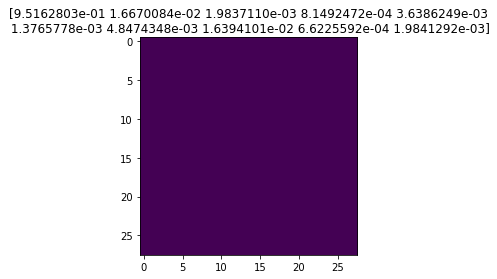

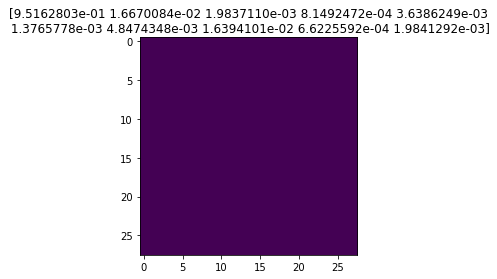

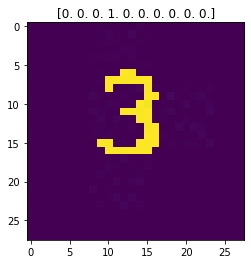

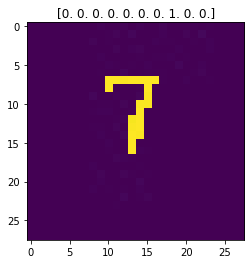

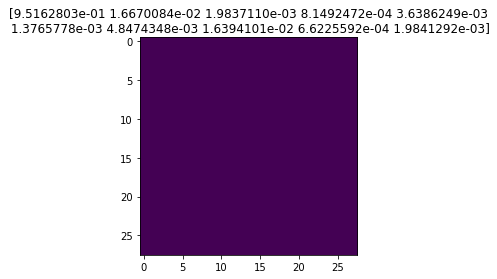

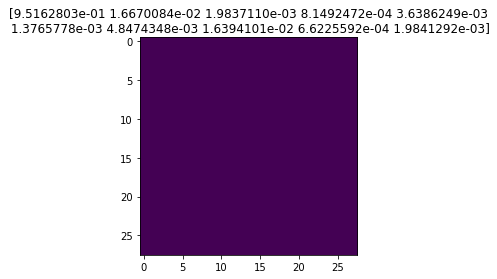

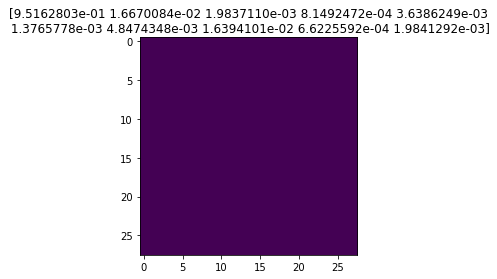

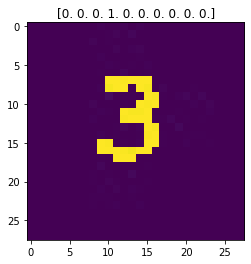

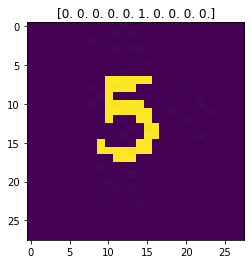

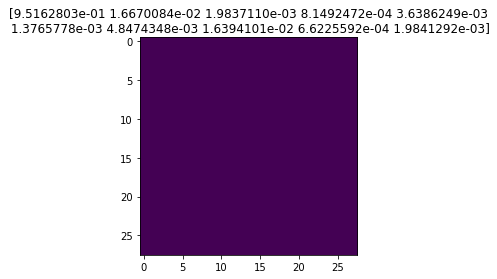

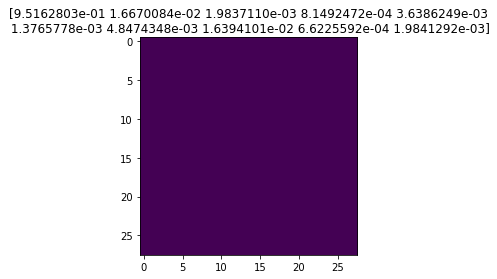

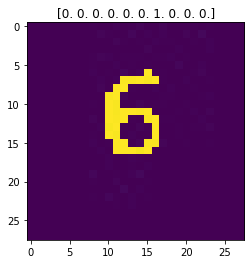

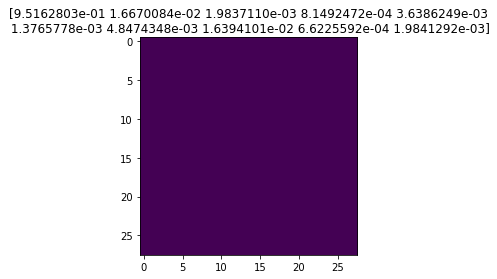

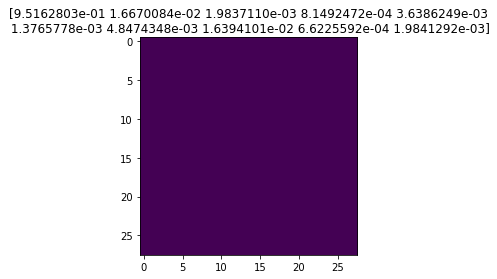

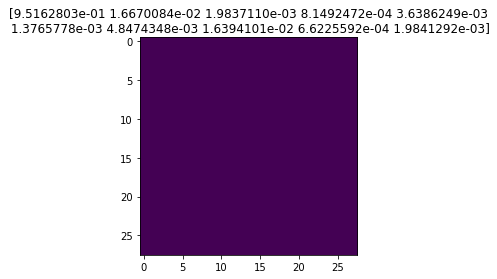

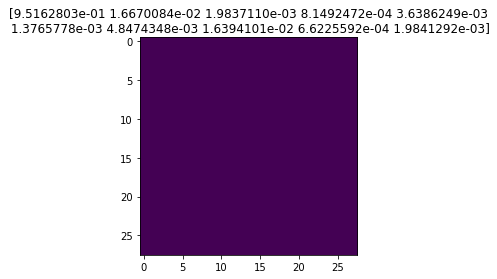

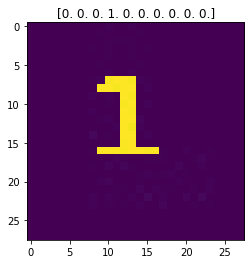

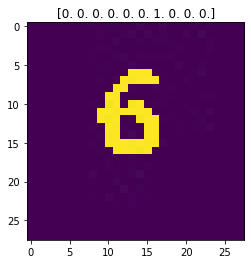

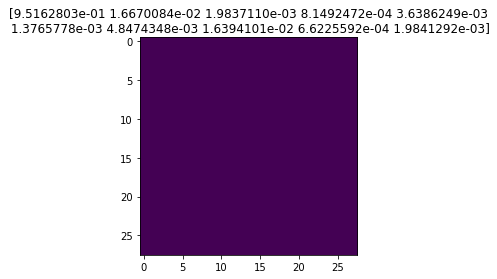

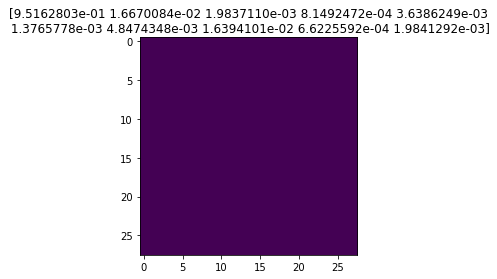

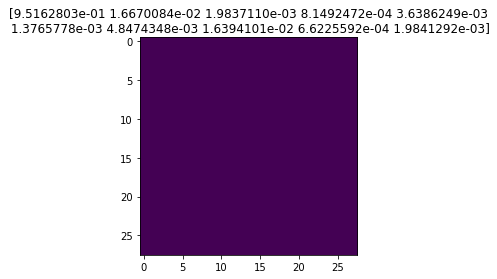

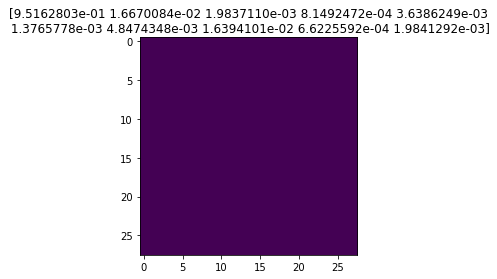

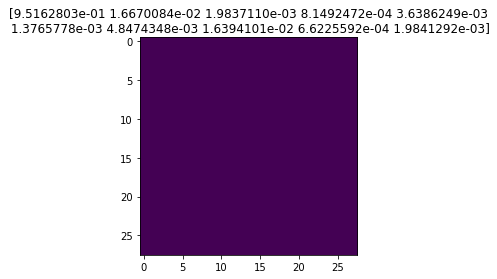

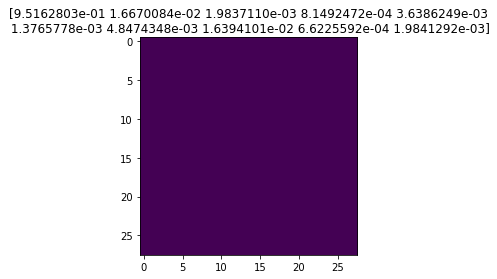

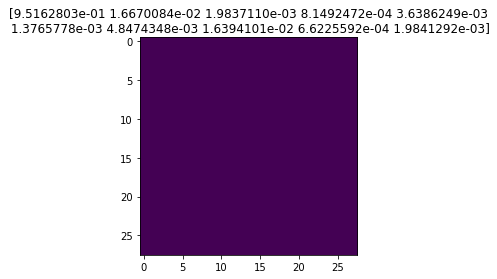

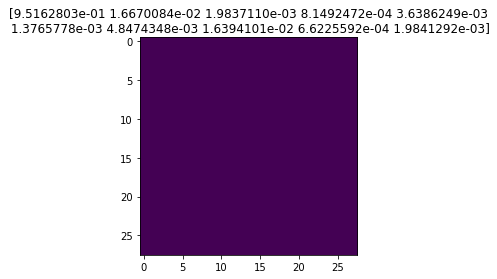

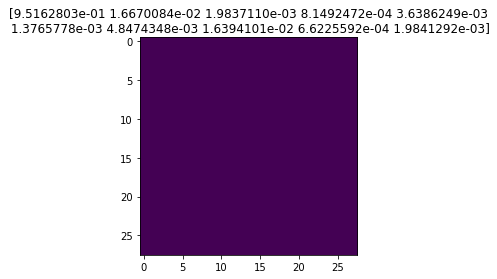

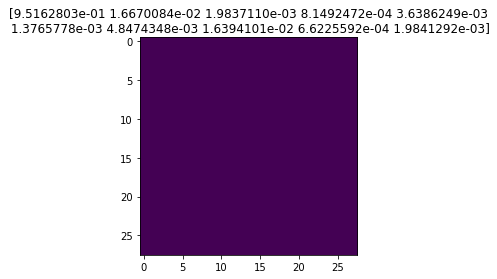

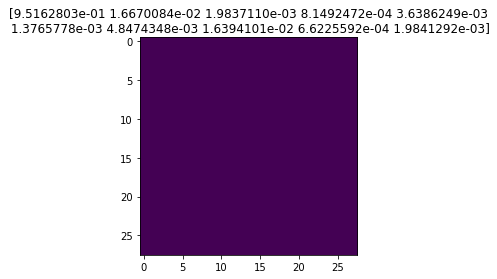

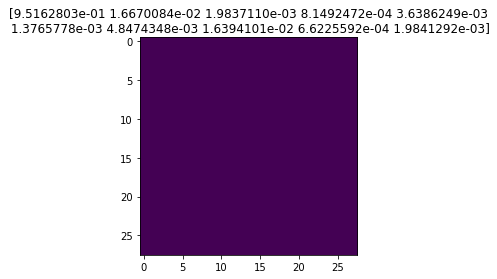

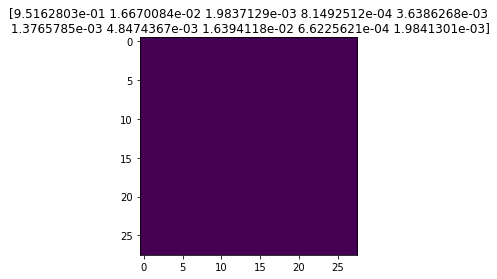

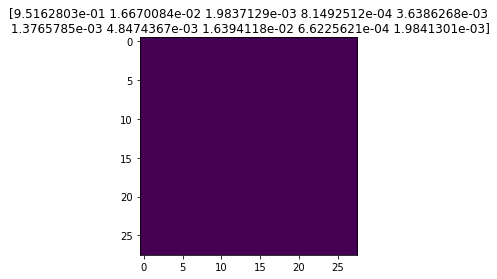

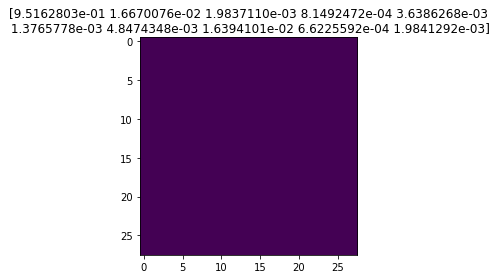

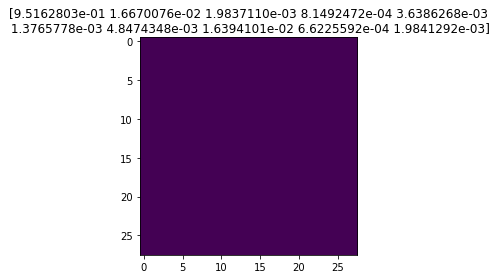

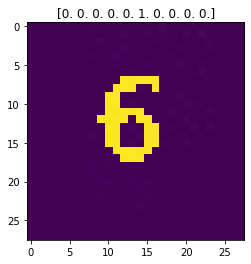

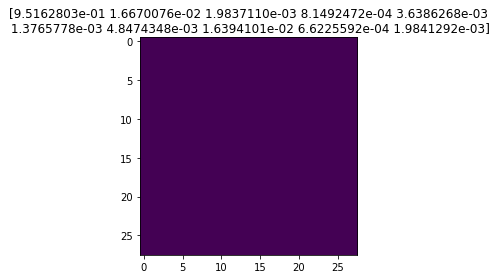

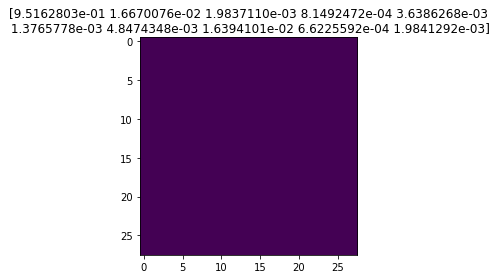

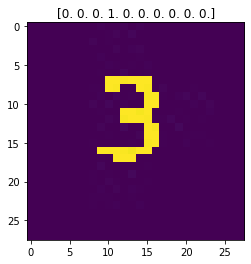

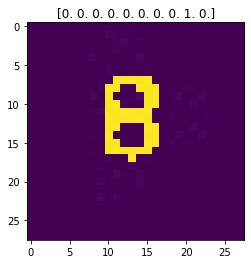

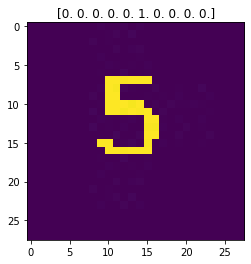

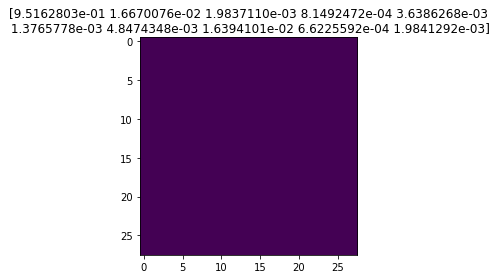

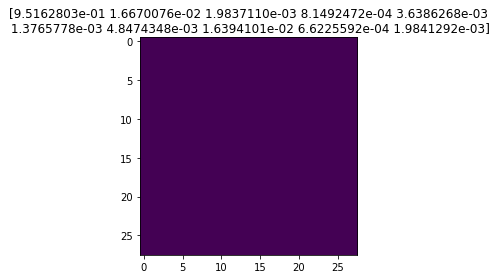

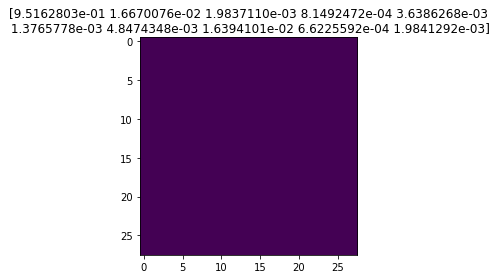

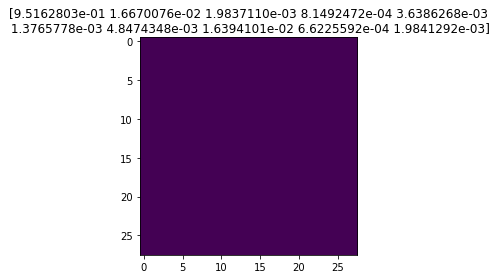

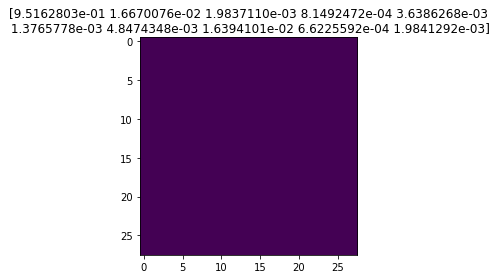

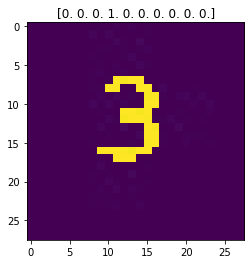

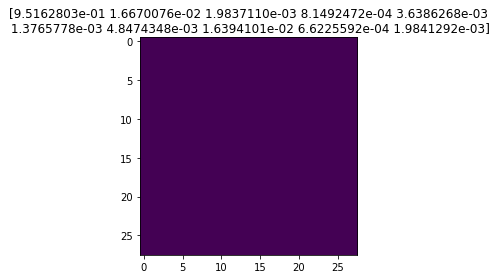

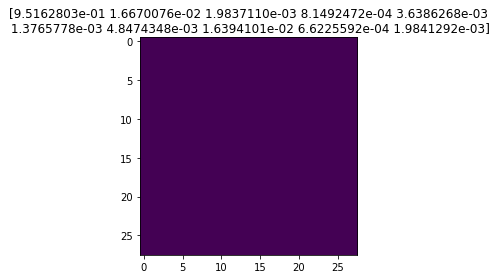

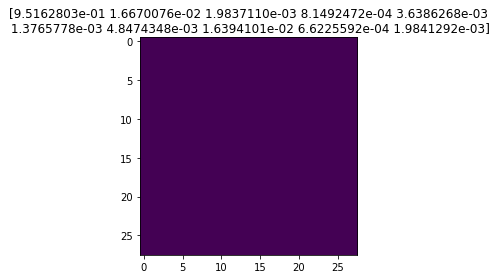

In [41]:
import matplotlib.pyplot as plt

pred = model.predict(X_life)

for i in range(len(pred)):
    plt.imshow(X_life[i])
    plt.title(pred[i])
    plt.show()

In [23]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

In [24]:
model.save("drecv2")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: drecv2/assets
